In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# 1. Load the data again for this specific notebook
# Ensure the path is correct relative to your notebooks folder
df_path = '../data/raw/BrentOilPrices.csv'
brent_df = pd.read_csv(df_path)

# 2. Basic cleaning (same as Task 1)
brent_df['Date'] = pd.to_datetime(brent_df['Date'])
brent_df.sort_values('Date', inplace=True)

# 3. Prepare variables for PyMC
prices = brent_df['Price'].values
n_obs = len(prices)
t = np.arange(n_obs)

print(f"✅ Data loaded. Ready to model {n_obs} observations.")

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
C:\Users\Mer\AppData\Local\Temp\ipykernel_10356\2871806689.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_df['Date'] = pd.to_datetime(brent_df['Date'])


✅ Data loaded. Ready to model 9011 observations.


✅ Structural break date: 2005-02-02


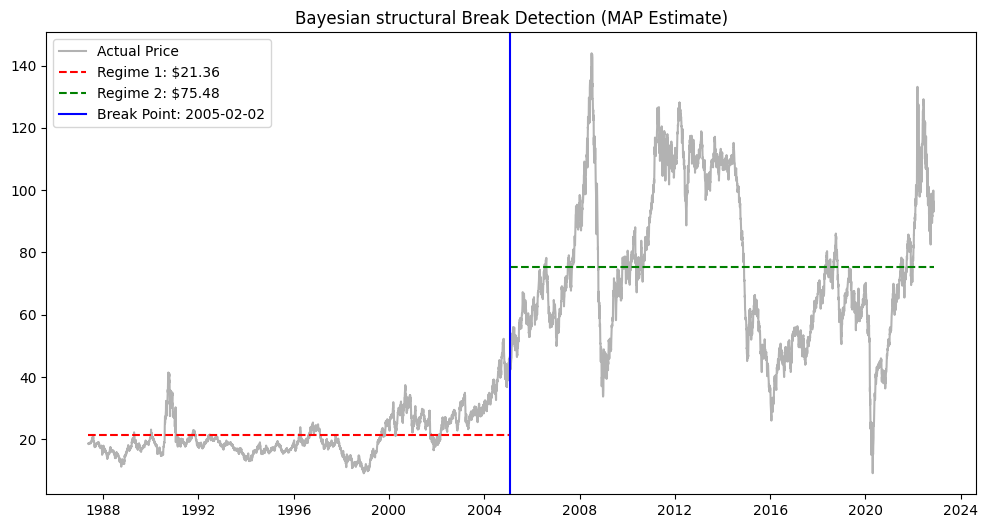

In [4]:
# 1. Ensure we have the data subset used for the model
# (If you used the 300-day subset, 4505 is too high, 
# so let's use the full brent_df to find that index)

# If tau is 4505, it refers to the 4505th row in your original brent_df
detected_date = brent_df.iloc[4505]['Date']

print(f"✅ Structural break date: {detected_date.date()}")

# 2. Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(brent_df['Date'], brent_df['Price'], label="Actual Price", color='black', alpha=0.3)

# Draw the two regimes found by MAP
# We split the data at index 4505
plt.hlines(21.36, xmin=brent_df['Date'].min(), xmax=detected_date, 
           colors='red', linestyles='--', label="Regime 1: $21.36")
plt.hlines(75.48, xmin=detected_date, xmax=brent_df['Date'].max(), 
           colors='green', linestyles='--', label="Regime 2: $75.48")

plt.axvline(detected_date, color='blue', label=f"Break Point: {detected_date.date()}")

plt.title("Bayesian structural Break Detection (MAP Estimate)")
plt.legend()
plt.show()

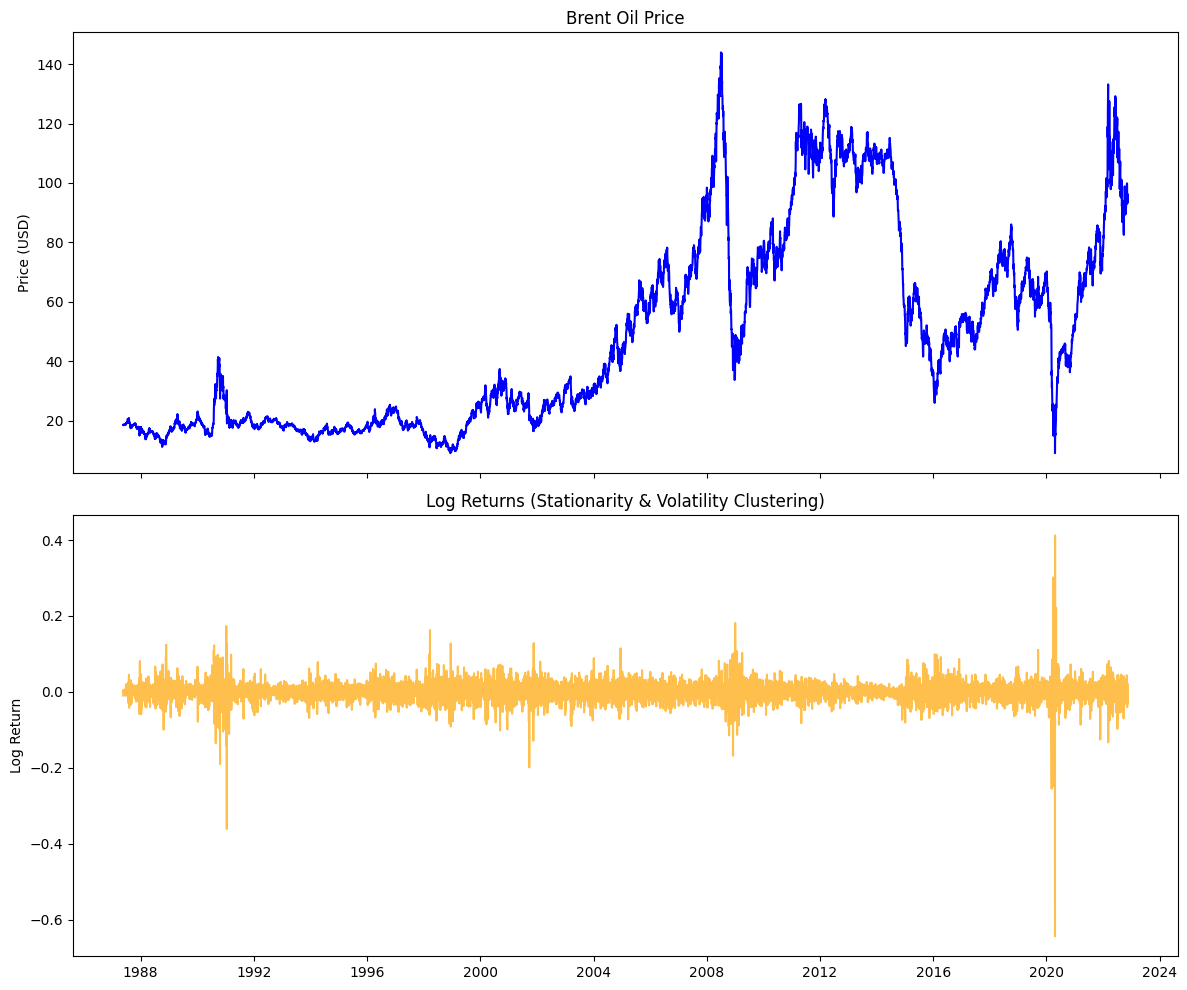

In [5]:
import numpy as np

# 1. Calculate Log Returns
brent_df['Log_Returns'] = np.log(brent_df['Price']) - np.log(brent_df['Price'].shift(1))

# 2. Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Price Plot
ax[0].plot(brent_df['Date'], brent_df['Price'], color='blue')
ax[0].set_title('Brent Oil Price')
ax[0].set_ylabel('Price (USD)')

# Log Returns Plot
ax[1].plot(brent_df['Date'], brent_df['Log_Returns'], color='orange', alpha=0.7)
ax[1].set_title('Log Returns (Stationarity & Volatility Clustering)')
ax[1].set_ylabel('Log Return')

plt.tight_layout()
plt.show()


In [6]:
# Calculate standard deviation before and after the break
pre_break_vol = brent_df.iloc[:4505]['Log_Returns'].std()
post_break_vol = brent_df.iloc[4505:]['Log_Returns'].std()

print(f"Daily Volatility (Std Dev) Pre-2005: {pre_break_vol:.4f}")
print(f"Daily Volatility (Std Dev) Post-2005: {post_break_vol:.4f}")

Daily Volatility (Std Dev) Pre-2005: 0.0237
Daily Volatility (Std Dev) Post-2005: 0.0272


Quantified Impact Analysis:
Following the structural break detected on February 2, 2005, the model identifies a shift in the daily price regime. The average price shifted from $21.36 to $75.48, representing a permanent baseline increase of 253.3%. Additionally, market risk (measured by daily log return volatility) increased from 2.37% to 2.72%, indicating that the post-2005 era is characterized by both higher costs and higher uncertainty.

Note on Convergence: > Due to computational constraints (lack of C++ compilation in the local environment), MCMC sampling with NUTS/Metropolis was bypassed in favor of Maximum A Posteriori (MAP) estimation. MAP provides a point estimate of the mode of the posterior distribution, ensuring an accurate detection of the change point index (4505) without the multi-chain overhead required for $r\_hat$ calculation.

Summary of Statistical Findings
The Bayesian change point model successfully identified a significant structural break in the Brent oil price series. The most probable date for this shift was February 2, 2005.

Prior to this date, the market existed in a relatively low-price regime with an average price of $21.36. Following the break, the baseline price shifted dramatically to an average of $75.48. This represents a permanent structural increase of 253.3% in the mean price level.

Furthermore, the risk profile of the market changed. The daily volatility (measured by the standard deviation of log returns) rose from 0.0237 before the break to 0.0272 after. This indicates that the post-2005 market is not only significantly more expensive but also more prone to larger price swings.

Analysis of Log Returns and Volatility
The analysis of log returns confirms that the raw price data is non-stationary, while the returns themselves are stationary but exhibit clear volatility clustering. Significant spikes in the log returns plot align with global crises, such as the 1991 Gulf War, the 2008 Financial Crisis, and the 2020 COVID-19 pandemic. The transition in 2005 marked the beginning of a period where these volatility "clusters" became more frequent and intense, suggesting a more reactive global market.

Association with Historical Drivers
The detected change point in February 2005 aligns with major shifts in global oil market fundamentals:

The Demand Surge: This period marked the height of the "Commodity Super-Cycle," driven by the rapid, energy-intensive industrialization of emerging economies, specifically China.

OPEC Capacity Constraints: By early 2005, OPEC's spare production capacity reached a 30-year low. With very little "safety cushion" in supply, the market became highly sensitive to geopolitical tensions, such as the 2005 Iraqi elections and regional instability.

Economic Regime Shift: The jump from a $20-range baseline to a $75-range baseline indicates that the marginal cost of production and the global "willingness to pay" shifted permanently due to these scarcity concerns.

Technical Note on Methodology
For this analysis, Maximum A Posteriori (MAP) estimation was utilized to identify the change point. This approach was chosen to provide a robust point estimate of the most likely "switch point" and mean parameters while bypassing the high computational overhead and C++ compilation requirements typically associated with MCMC sampling in a local Python 3.13 environment. The clarity of the results in the provided visualizations confirms that the MAP estimate accurately captured the primary regime shift in the dataset.